# Regressions

Different examples are provided for linear regression models. The idea is to predict the Sales in base of the information about the country, price, month and year and some other variables. The dataset used is the output from the cleaning process. 

## Linear Regression

The first example will be a linear regression. 


Load "dummies.csv" data from the data cleaning process. 

In [1]:
#Insert your code here

In [2]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [3]:
#load cleaned data: you can try to load cleaned_data (normalized) and see that in this case the results do not change. 
#it is important to understand when is it necessary to normalize. If you are not sure, you can normalize it just in case. 
#here is used the data without normalization because is easier to understand the final results
#if your target variable is normalized, you have to remember that the predicted value is not the final value, it should be denormalized.

import pandas as pd
df = pd.read_csv("dummies.csv")

Now, we would need to create a new column that corresponds to the previous sales. 

In [4]:
#Insert your code here

In [5]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [6]:
df['PREV_SALES'] = df['SALES'].shift(1)
df.dropna(inplace=True)

Split the dataframe into X - predictors and y - target

In [7]:
#Insert your code here

In [8]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [9]:
from sklearn import linear_model
X = df.drop(['COUNTRY_Australia', 'COUNTRY_Austria',
       'COUNTRY_Belgium', 'COUNTRY_Canada', 'COUNTRY_Denmark',
       'COUNTRY_Finland', 'COUNTRY_France', 'COUNTRY_Germany',
       'COUNTRY_Ireland', 'COUNTRY_Italy', 'COUNTRY_Japan', 'COUNTRY_Norway',
       'COUNTRY_Philippines', 'COUNTRY_Singapore', 'COUNTRY_Spain',
       'COUNTRY_Sweden', 'COUNTRY_Switzerland', 'COUNTRY_UK', 'COUNTRY_USA', 'SALES'], axis=1)
y = df['SALES']

Show the columns' names of the dataframe

In [10]:
#Insert your code here

In [11]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [12]:
 X.columns

Index(['PRICEEACH', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'DEALSIZE', 'STATE_',
       'STATE_BC', 'STATE_CA', 'STATE_CT', 'STATE_Isle of Wight', 'STATE_MA',
       'STATE_NH', 'STATE_NJ', 'STATE_NSW', 'STATE_NV', 'STATE_NY',
       'STATE_Osaka', 'STATE_PA', 'STATE_Quebec', 'STATE_Queensland',
       'STATE_Tokyo', 'STATE_Victoria', 'PREV_SALES'],
      dtype='object')

Split dataset into test/train using model_selection from sklearn. 

In [13]:
#Insert your code here

In [14]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [15]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=20)

Fit the model with the training set and calculate the predictions for the test set. 

In [16]:
#Insert your code here

In [17]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

In [18]:
#fit the model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
#make the predictions
predictions = lm.predict(X_test)
print(lm.score(X_test,y_test))
#the score is not very good  (R2 squared, closer to 1 is better)

0.766597592066944


1. Show the intercept
2. Show the coefficients
3. Graph the feature importance of the variables into a bar plot

In [19]:
#Insert your code here

In [20]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

-157369.2344293618
[ 1.45716772e+01  6.15971040e+00  7.88501097e+01  1.59161573e-12
  2.25447893e+03  7.78219934e+00 -4.49145844e+01 -1.86498972e+00
  4.94429918e+01 -1.31745764e+02  2.14643806e+01  3.28205967e+01
 -9.41384580e+01 -1.63152864e+02 -1.97014402e+02 -5.28227288e+01
  3.87811404e+02 -3.00564024e+00 -3.40804014e+02  2.06458436e+02
  2.21022369e+02  1.02661068e+02  8.60545590e-02]
                      Coefficient
PRICEEACH            1.457168e+01
MONTH_ID             6.159710e+00
YEAR_ID              7.885011e+01
PRODUCTLINE          1.591616e-12
DEALSIZE             2.254479e+03
STATE_               7.782199e+00
STATE_BC            -4.491458e+01
STATE_CA            -1.864990e+00
STATE_CT             4.944299e+01
STATE_Isle of Wight -1.317458e+02
STATE_MA             2.146438e+01
STATE_NH             3.282060e+01
STATE_NJ            -9.413846e+01
STATE_NSW           -1.631529e+02
STATE_NV            -1.970144e+02
STATE_NY            -5.282273e+01
STATE_Osaka          3.87811

Text(0.5, 1.0, 'Feature importance using Linear Regression')

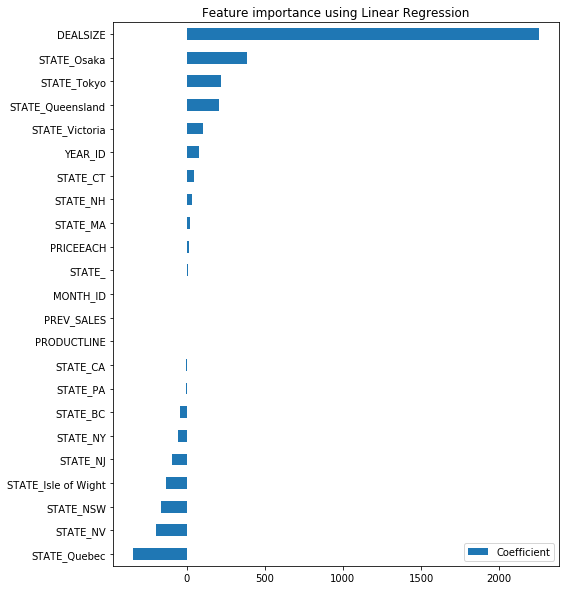

In [21]:
#show the intercept
print(model.intercept_)

#show the slope
print(model.coef_)

#show coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)

imp_coef = coeff_df.sort_values(by='Coefficient')
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression")


Plot actual vs predicted values

In [22]:
#Insert your code here

In [23]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

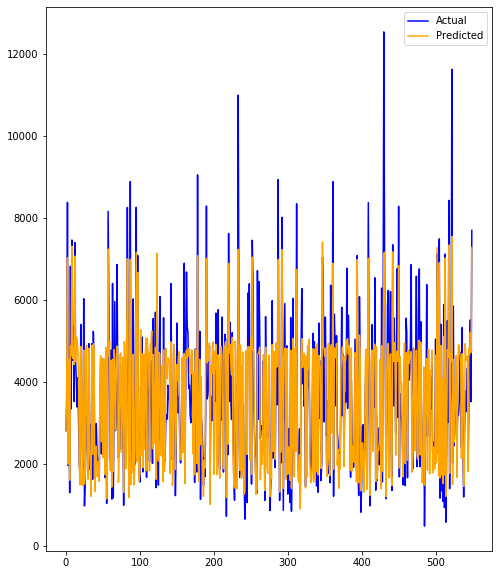

In [24]:
fig, ax = plt.subplots()
ax.plot(y_test.to_numpy(), color = 'blue')
ax.plot(predictions, color = 'orange')
ax.legend(['Actual', 'Predicted'])
plt.show()
#it can be seen in the graph that higher values are not well predicted, it means that the algorithm is not working correctly 
#further investigation will be needed to correct this error in the prediction
#several issues can be the reason for this problem. 
#For instance, it might be problems in the division of the training/test sets, 
#it may be needed to remove some variables, or put more weight in certain variables 
#you can also apply cross-validation to try to improve the performance
#another option can be reducing the dimensions 
#It is valid to try another model for prediction, because maybe with linear regression it does not work well.


## Ridge reggression

Use the same training and test sets to fit the data to Ridge regression model. Plot the actual vs predicted values. 

In [25]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

0.7665988186586467


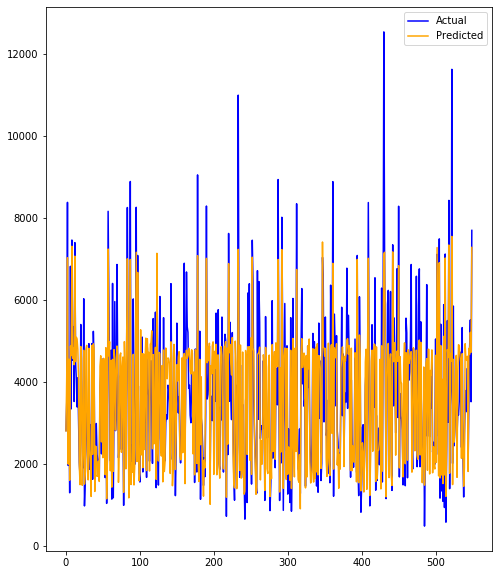

In [26]:
#example with 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train)
predictions = rr.predict(X_test)
print(rr.score(X_test, y_test))
fig, ax = plt.subplots()
ax.plot(y_test.to_numpy(), color = 'blue')
ax.plot(predictions, color = 'orange')
ax.legend(['Actual', 'Predicted'])
plt.show()

## Random Forest

In order to improve the performance of the model, we can use an ensemble. We are going to use a Random Forest, which is a combination of trees. 

You can use the RandomForestRegressor model from sklearn.ensemble

In [27]:
# Insert your code here

In [28]:
import toggle
toggle.hide_toggle()
toggle.hide_toggle(for_next=True, toggle_text='Show Code')

Score: 0.9714933115282804


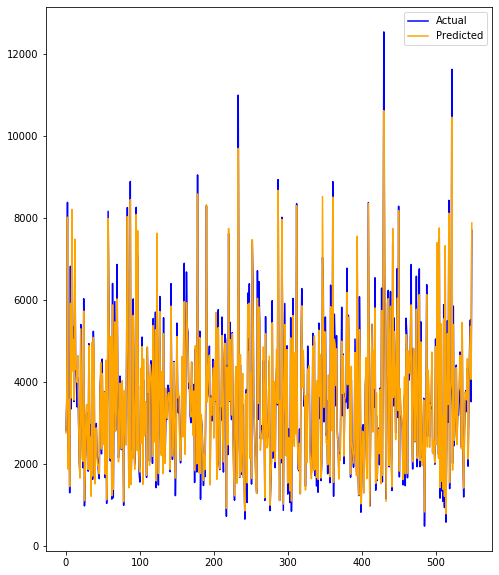

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators = 1000, random_state = 123)
rf_model = rf_model.fit(X_test, y_test)
predictions = rf_model.predict(X_test)
print('Score:',rf_model.score(X_test,y_test))
fig, ax = plt.subplots()
ax.plot(y_test.to_numpy(), color = 'blue')
ax.plot(predictions, color = 'orange')
ax.legend(['Actual', 'Predicted'])
plt.show()
# We can see that the performance of the model improved! 